In [8]:
import time 
import requests
import cv2
import operator
import numpy as np

# Import library to display results
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter
from IPython.display import clear_output

In [9]:
# Define the API to use
_url = 'https://api.projectoxford.ai/emotion/v1.0/recognize'
_key = 'c0958b1e63134377960c2796e82aa14e'
_maxNumRetries = 10

In [10]:
# Functions to use the API
def processRequest( json, data, headers ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = None )

        if response.status_code == 429: 

            print("Message: %s" % ( response.json()['error']['message'] ))

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print('Error: failed after retrying!')
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print("Error code: %d" % ( response.status_code ))
            print("Message: %s" % ( response.json()['error']['message'] ))

        break
        
    return result

In [11]:
# Fuction to add the emotion to the image
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""
    
    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        cv2.rectangle( img,(faceRectangle['left'],faceRectangle['top']),
                           (faceRectangle['left']+faceRectangle['width'], faceRectangle['top'] + faceRectangle['height']),
                       color = (255,0,0), thickness = 5 )


    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]


        textToWrite = "%s" % ( currEmotion )
        cv2.putText( img, textToWrite, (faceRectangle['left'],faceRectangle['top']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1 )

happiness


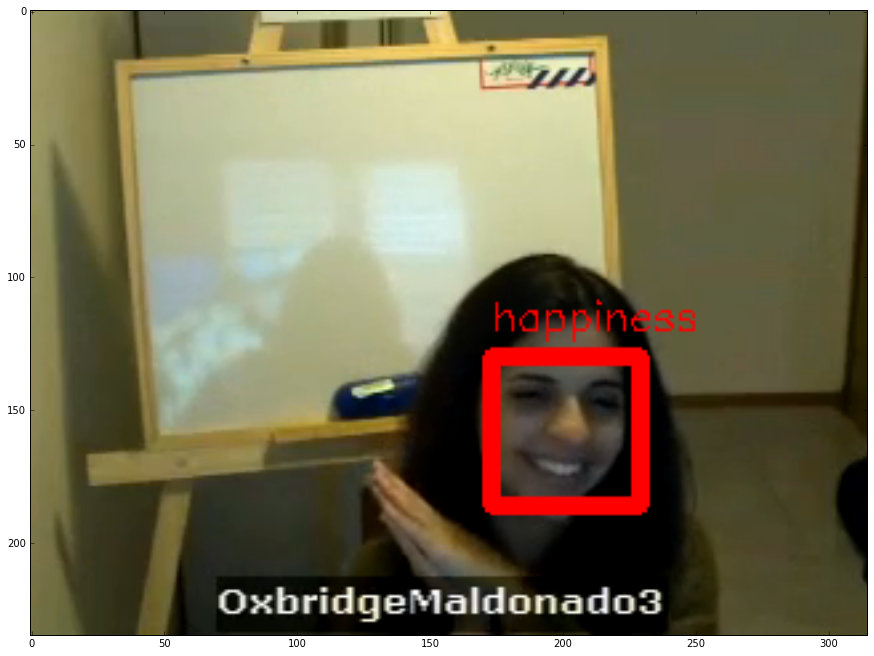

In [12]:
# Read a static image and assign emotion
pathToFileInDisk = r'frame2.png'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( json, data, headers )

for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]
        print(currEmotion)



# Load the original image from disk
data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

renderResultOnImage( result, img )

ig, ax = plt.subplots(figsize=(15, 20))
ax.imshow( img )

In [13]:
# Take frame from a video and save them as files
%matplotlib inline 

cap = cv2.VideoCapture('Video.avi')
    
for x in range(0, 100):
    framenumber=x*100  
    ret, frame = cap.read(framenumber)
    if ret:
        sub_frame = frame
        filename = "frames/video1frame" + str(framenumber) +".png"
        cv2.imwrite(filename,frame)
print("Finished")

Finished


In [14]:
# Use those files to query the API and obtain the emotion

for x in range(0, 100):
    framenumber=x*100
    filename = "frames/video1frame" + str(framenumber) +".png"
    pathToFileInDisk = filename
    with open( pathToFileInDisk, 'rb' ) as f:
        data = f.read()

    headers = dict()
    headers['Ocp-Apim-Subscription-Key'] = _key
    headers['Content-Type'] = 'application/octet-stream'

    json = None

    result = processRequest( json, data, headers )

    for currFace in result:
        faceRectangle = currFace['faceRectangle']
        currEmotion = max(currFace['scores'].items(), key=operator.itemgetter(1))[0]

    # Load the original image from disk
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.imshow(img[50:300, 750:1100])
    plt.show()
    clear_output(wait=True)

Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.
Message: Rate limit is exceeded. Try again later.


KeyboardInterrupt: 